<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/M3_AI4_Penetraci%C3%B3n%20y%20crecimiento%20de%20Facebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alumno:** César Emilio García Ávalos

**Actividad:** M3_AI3_Preparar datos de Facebook por país

In [204]:
library(readr)
library(tidyr)
library(dplyr)
library(ggplot2)
install.packages("stargazer")
library(stargazer)
ruta <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/fb_long.txt"
datos <- read.csv(ruta, sep = ";")
str(datos)
head(datos)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	156 obs. of  5 variables:
 $ pais_r          : chr  "Algeria" "Argentina" "Australia" "Austria" ...
 $ Facebook_num    : int  928100 10542040 9009660 2084840 139460 226480 854520 3505920 4757200 15497900 ...
 $ Internet_por_num: chr  "12,5" "45" "76" "75,17" ...
 $ poblacion_num   : int  35977455 40788453 22031750 8363404 354942 1240860 147575430 10895586 195713635 34004889 ...
 $ anyo            : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...


,pais_r,Facebook_num,Internet_por_num,poblacion_num,anyo
,<chr>,<int>,<chr>,<int>,<int>
1,Algeria,928100,"12,5",35977455,2010
2,Argentina,10542040,45,40788453,2010
3,Australia,9009660,76,22031750,2010
4,Austria,2084840,"75,17",8363404,2010
5,"Bahamas, The",139460,43,354942,2010
6,Bahrain,226480,55,1240860,2010


In [205]:
estadisticos <- summary(datos)
estadisticos

    pais_r           Facebook_num       Internet_por_num   poblacion_num      
 Length:156         Min.   :    26840   Length:156         Min.   :3.180e+05  
 Class :character   1st Qu.:  1402950   Class :character   1st Qu.:6.806e+06  
 Mode  :character   Median :  3543690   Mode  :character   Median :2.315e+07  
                    Mean   : 15175281                      Mean   :7.855e+07  
                    3rd Qu.: 14150075                      3rd Qu.:6.333e+07  
                    Max.   :300000000                      Max.   :1.393e+09  
      anyo     
 Min.   :2010  
 1st Qu.:2010  
 Median :2014  
 Mean   :2014  
 3rd Qu.:2018  
 Max.   :2018  

In [206]:
datos$Internet_por_num <- as.numeric(gsub(",",".",datos$Internet_por_num))
# Calcular Facebook_num como el porcentaje de usuarios de Facebook sobre el total de la población
datos$Facebook_num <- datos$Facebook_num / datos$poblacion_num * 100
summary(datos)
estadisticos <- summary(datos)
estadisticos

    pais_r           Facebook_num      Internet_por_num poblacion_num      
 Length:156         Min.   : 0.00893   Min.   : 0.75    Min.   :3.180e+05  
 Class :character   1st Qu.:11.96904   1st Qu.:40.58    1st Qu.:6.806e+06  
 Mode  :character   Median :34.22846   Median :66.00    Median :2.315e+07  
                    Mean   :34.07095   Mean   :60.80    Mean   :7.855e+07  
                    3rd Qu.:53.42194   3rd Qu.:83.55    3rd Qu.:6.333e+07  
                    Max.   :90.33368   Max.   :99.65    Max.   :1.393e+09  
                                       NA's   :1                           
      anyo     
 Min.   :2010  
 1st Qu.:2010  
 Median :2014  
 Mean   :2014  
 3rd Qu.:2018  
 Max.   :2018  
               

    pais_r           Facebook_num      Internet_por_num poblacion_num      
 Length:156         Min.   : 0.00893   Min.   : 0.75    Min.   :3.180e+05  
 Class :character   1st Qu.:11.96904   1st Qu.:40.58    1st Qu.:6.806e+06  
 Mode  :character   Median :34.22846   Median :66.00    Median :2.315e+07  
                    Mean   :34.07095   Mean   :60.80    Mean   :7.855e+07  
                    3rd Qu.:53.42194   3rd Qu.:83.55    3rd Qu.:6.333e+07  
                    Max.   :90.33368   Max.   :99.65    Max.   :1.393e+09  
                                       NA's   :1                           
      anyo     
 Min.   :2010  
 1st Qu.:2010  
 Median :2014  
 Mean   :2014  
 3rd Qu.:2018  
 Max.   :2018  
               

Análisis multivariante para año 2010 :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.75   25.00   45.00   48.18   71.69   93.39       1 
Análisis multivariante para año 2018 :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.60   58.84   78.87   73.25   88.83   99.65 


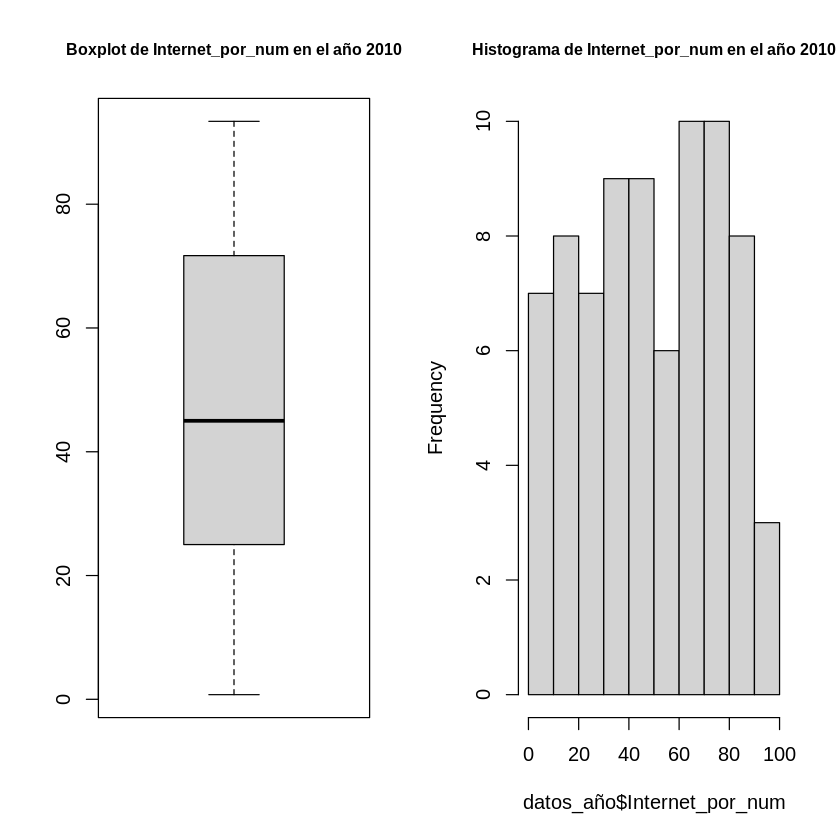

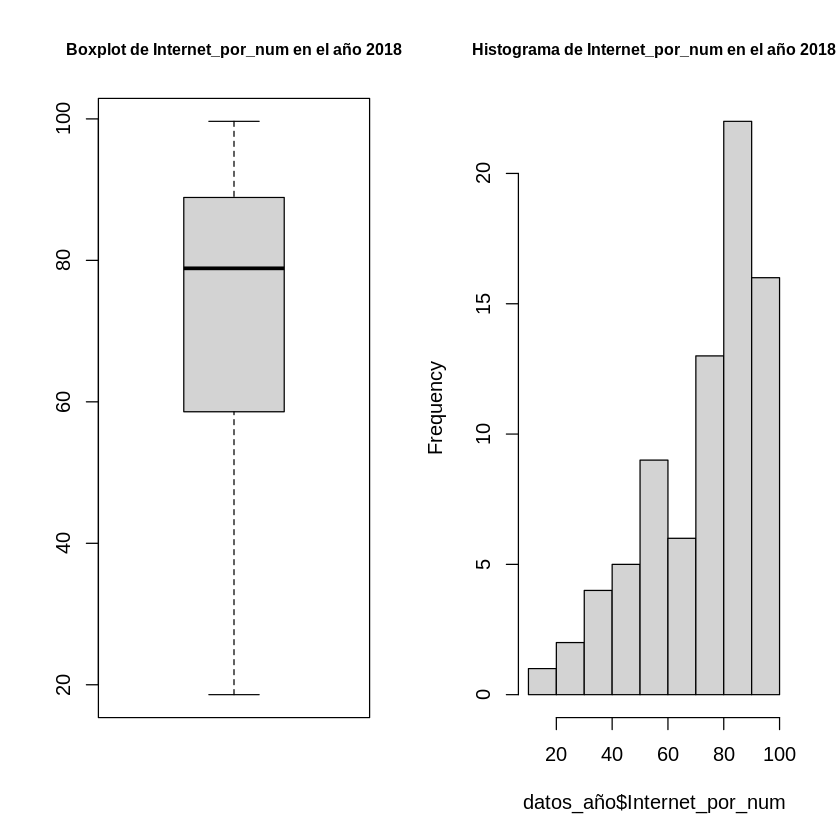

In [207]:
par(mfrow = c(1, 2))
for (año in unique(datos$anyo)) {
  datos_año <- subset(datos, anyo == año)
  resumen <- summary(datos_año$Internet_por_num)
  cat("Análisis multivariante para año", año, ":\n")
  print(resumen)
  boxplot(datos_año$Internet_por_num, main = paste("Boxplot de Internet_por_num en el año", año), cex.main = 0.8)
  hist(datos_año$Internet_por_num, main = paste("Histograma de Internet_por_num en el año", año), cex.main = 0.8)
}
par(mfrow = c(1, 1))

Análisis multivariante para año 2010 :
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00893  3.25831 17.20593 19.28279 28.98584 83.45465 
Análisis multivariante para año 2018 :
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1292 42.2276 53.3234 48.8591 63.3818 90.3337 


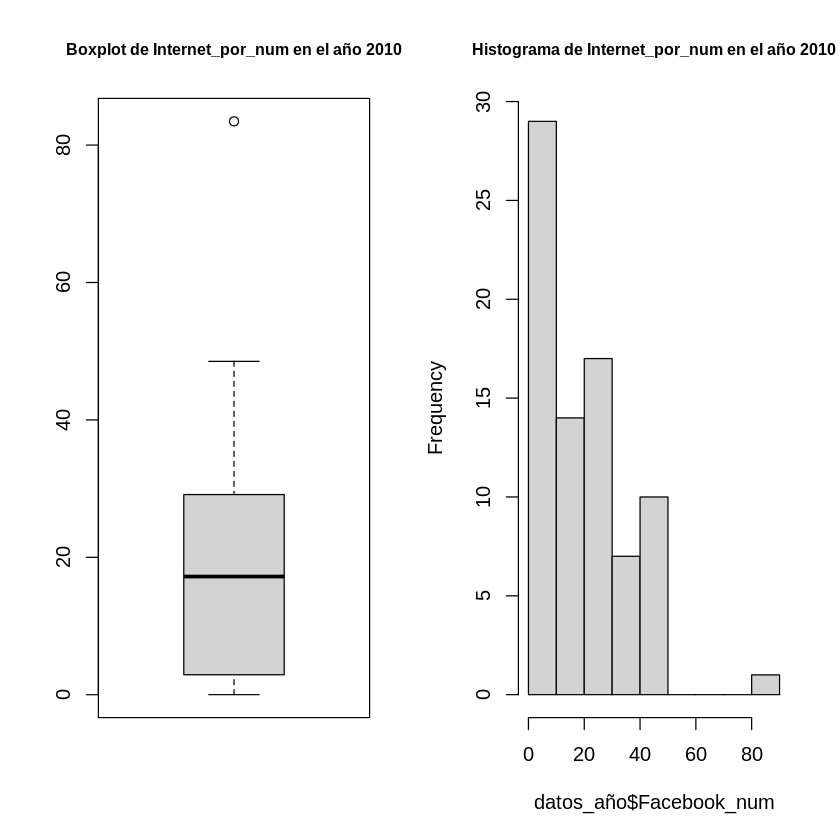

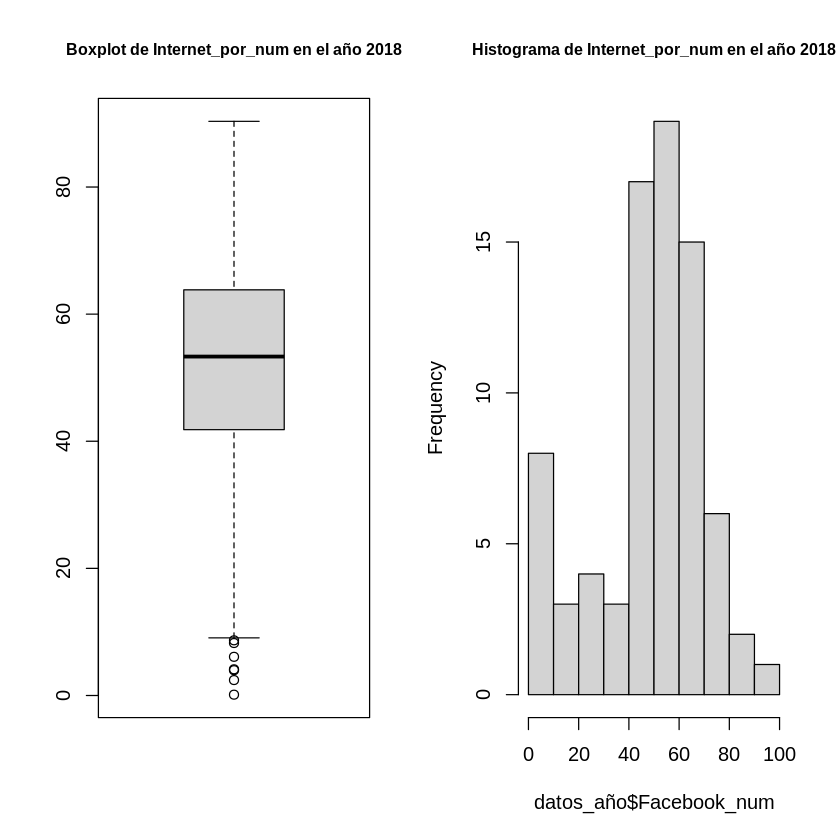

In [208]:
par(mfrow = c(1, 2))
for (año in unique(datos$anyo)) {
  datos_año <- subset(datos, anyo == año)
  resumen <- summary(datos_año$Facebook_num)
  cat("Análisis multivariante para año", año, ":\n")
  print(resumen)
  boxplot(datos_año$Facebook_num, main = paste("Boxplot de Internet_por_num en el año", año), cex.main = 0.8)
  hist(datos_año$Facebook_num, main = paste("Histograma de Internet_por_num en el año", año), cex.main = 0.8)
}
par(mfrow = c(1, 1))

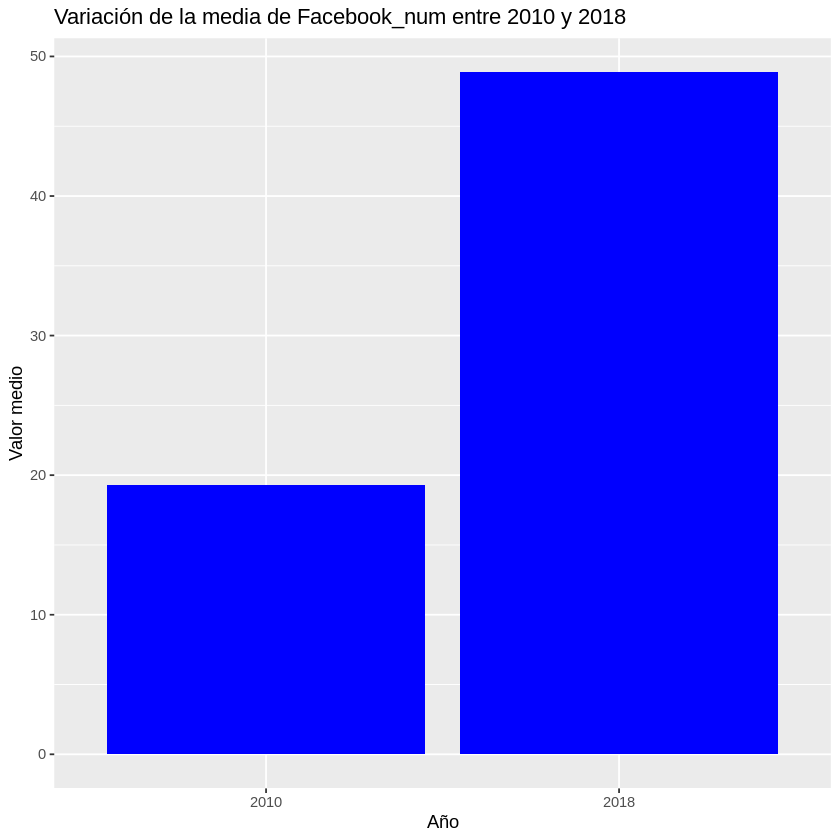

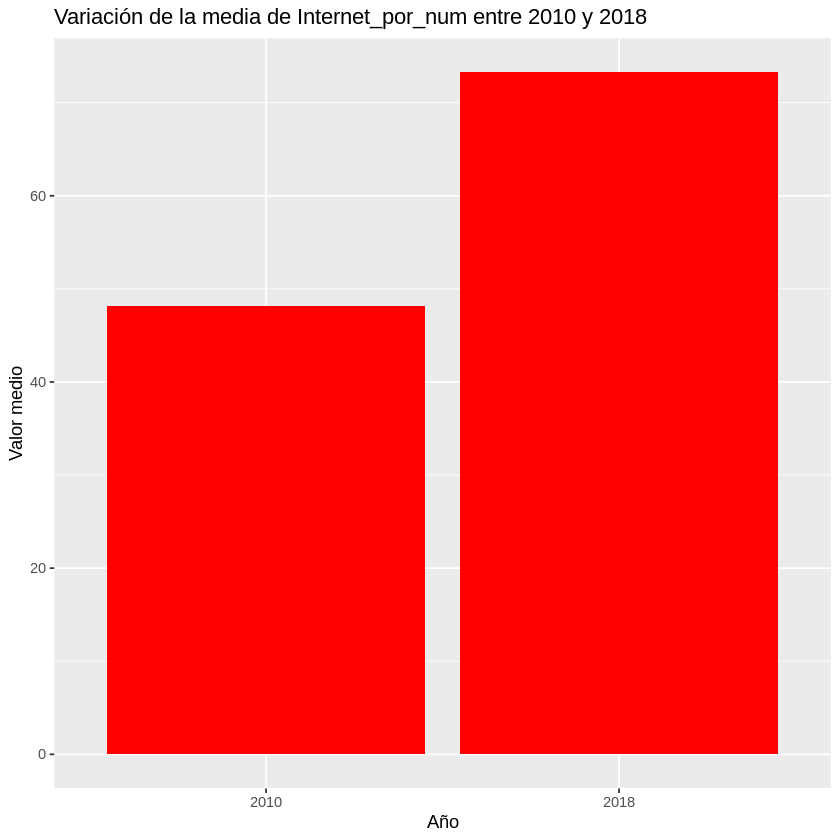

In [209]:
mean_facebook <- aggregate(Facebook_num ~ anyo, data = datos, FUN = mean)
mean_internet <- aggregate(Internet_por_num ~ anyo, data = datos, FUN = mean)

ggplot(mean_facebook, aes(x = factor(anyo), y = Facebook_num)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Variación de la media de Facebook_num entre 2010 y 2018",
       x = "Año",
       y = "Valor medio")

ggplot(mean_internet, aes(x = factor(anyo), y = Internet_por_num)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(title = "Variación de la media de Internet_por_num entre 2010 y 2018",
       x = "Año",
       y = "Valor medio")

`geom_smooth()` using formula = 'y ~ x'


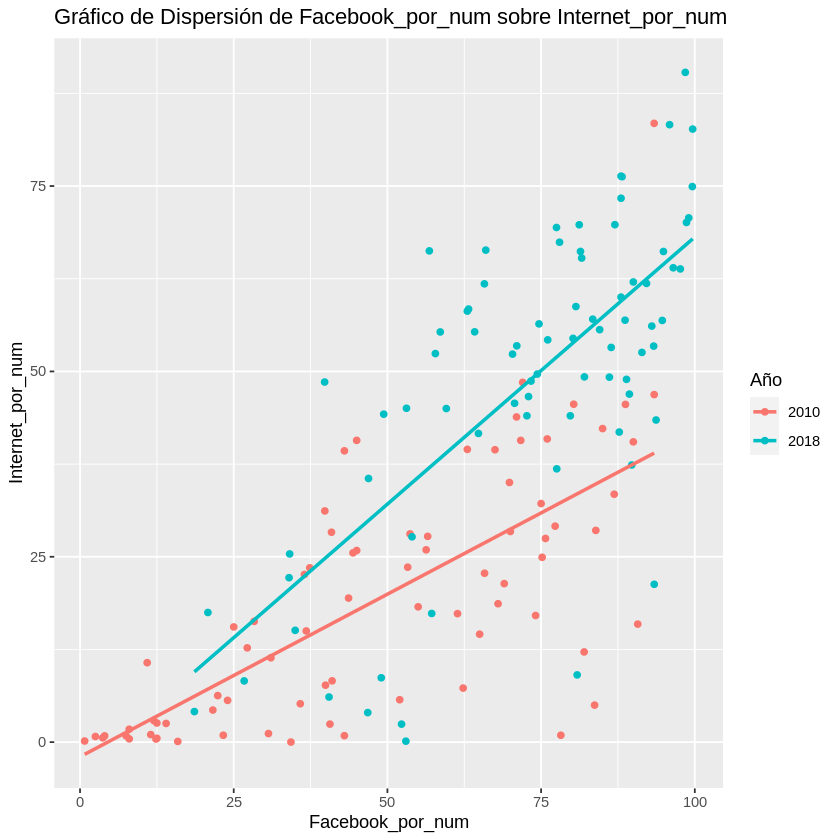

In [210]:
# Eliminar filas con valores no finitos o faltantes
datos <- datos[complete.cases(datos), ]

# Crear el gráfico de dispersión con rectas de regresión separadas por año
ggplot(datos, aes(x = Internet_por_num, y = Facebook_num, color = factor(anyo))) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, aes(group = factor(anyo))) +
  labs(title = "Gráfico de Dispersión de Facebook_por_num sobre Internet_por_num",
       x = "Facebook_por_num",
       y = "Internet_por_num",
       color = "Año")

In [211]:
# Ajustar modelos de regresión lineal para cada año
model_2010 <- lm(Facebook_num ~ Internet_por_num, data = datos[datos$anyo == 2010, ])
model_2018 <- lm(Facebook_num ~ Internet_por_num, data = datos[datos$anyo == 2018, ])

# Comparar los coeficientes utilizando stargazer
library(stargazer)
stargazer(model_2010, model_2018, type = "text", title = "Comparación de Coeficientes de Regresión (2010 vs 2018)",
          keep.stat = c("n", "rsq"), align = TRUE)


Comparación de Coeficientes de Regresión (2010 vs 2018)
                     Dependent variable:     
                 ----------------------------
                         Facebook_num        
                      (1)            (2)     
---------------------------------------------
Internet_por_num    0.439***      0.720***   
                    (0.050)        (0.084)   
                                             
Constant             -1.972        -3.920    
                    (2.754)        (6.423)   
                                             
---------------------------------------------
Observations           77            78      
R2                   0.508          0.489    
Note:             *p<0.1; **p<0.05; ***p<0.01


**2010:**

Coeficiente de Internet_por_num: El coeficiente es 0.439. Esto significa que, en promedio, por cada aumento unitario en el porcentaje de usuarios de Internet, el número de usuarios de Facebook aumenta en 0.439 unidades en 2010.

R² = 0.508. Esto significa que aproximadamente el 50.8% de la variabilidad en el número de usuarios de Facebook puede explicarse por el modelo de regresión lineal utilizando el porcentaje de usuarios de Internet como variable predictora en 2010. En otras palabras, el modelo explica razonablemente bien la variabilidad observada en los datos en 2010.

**2018:**

Coeficiente de Internet_por_num: El coeficiente es 0.720. Esto significa que, en promedio, por cada aumento unitario en el porcentaje de usuarios de Internet, el número de usuarios de Facebook aumenta en 0.720 unidades en 2018.

R² = 0.489. En este caso, aproximadamente el 48.9% de la variabilidad en el número de usuarios de Facebook puede explicarse por el modelo de regresión lineal utilizando el porcentaje de usuarios de Internet como variable predictora en 2018. Esto indica que el modelo explica una cantidad ligeramente menor de la variabilidad en los datos en 2018 en comparación con 2010.

El resultado del stargazer muestra los coeficientes estimados de la regresión lineal para el número de usuarios de Facebook (Facebook_num) en función del porcentaje de usuarios de Internet (Internet_por_num), para los años 2010 y 2018.

En el modelo de regresión lineal, el coeficiente asociado a la variable Internet_por_num indica cómo cambia el número de usuarios de Facebook cuando hay un cambio unitario en el porcentaje de usuarios de Internet.

En este caso, el coeficiente de Internet_por_num es mayor en 2018 (0.720) que en 2010 (0.439). Esto significa que, para un incremento dado en el porcentaje de usuarios de Internet, el aumento correspondiente en el número de usuarios de Facebook es mucho mayor en 2018 que en 2010.